# Testing of Hypothesis using scipy.stats

## (a) Test of Hypothesis for Population Mean (Known Variance)

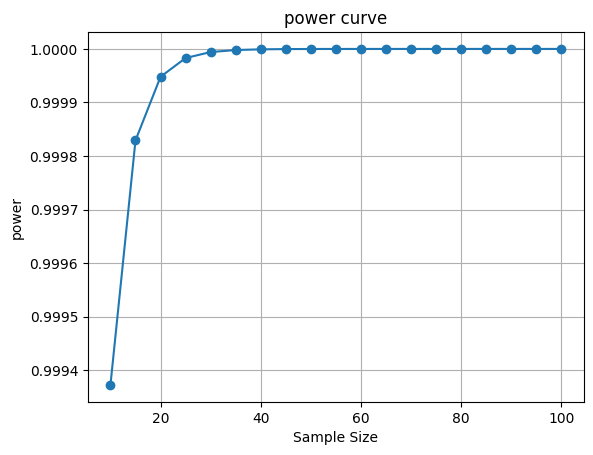

In [7]:

import numpy as np
from scipy import stats
import scipy.stats as ss

np.random.seed(0)

mu0 = 50
sigma = 4
n = 36
alpha = 0.05

# i. Generate sample
sample = np.random.normal(mu0, sigma, n)

# ii. Sample mean
xbar = np.mean(sample)

# iii. Hypothesis Test
z = (xbar - mu0) / (sigma/np.sqrt(n))

# iv. Critical values
z_crit = stats.norm.ppf(1-alpha/2)

# v. Decision
decision = "Reject H0" if abs(z) > z_crit else "Fail to Reject H0"

# vi. p-value
p_value = 2*(1-stats.norm.cdf(abs(z)))

# vii. Confidence Interval
ci = stats.norm.interval(0.95, loc=xbar, scale=sigma/np.sqrt(n))

# ix. Type II Error (mu=48)
mu_true = 48
z_beta1 = (xbar - mu0)/(sigma/np.sqrt(n))
beta = stats.norm.cdf(z_crit - (mu0-mu_true)/(sigma/np.sqrt(n))) - stats.norm.cdf(-z_crit - (mu0-mu_true)/(sigma/np.sqrt(n)))
power = 1 - beta

xbar, z, z_crit, decision, p_value, ci, beta, power

# Plot the power function
import matplotlib.pyplot as plt
mu_true=48
sample_size=np.arange(10,101,5)
powers=[]

for n in sample_size:
    z_alpha=ss.norm.ppf(0.05)
    beta=ss.norm.cdf(
    z_alpha+(mu_true-mu0)/(sigma/np.sqrt(n))
    )
    powers.append(1-beta)
    
plt.plot(sample_size,powers,marker='o')
plt.xlabel('Sample Size')
plt.ylabel('power')
plt.title('power curve')
plt.grid(True)
plt.show()

## (b) One-Sided Test

In [2]:
# One-sided test (mu < 50)

z_left = stats.norm.ppf(alpha)
p_value_left = stats.norm.cdf(z)
decision_left = "Reject H0" if z < z_left else "Fail to Reject H0"

# Type II error for mu=48
beta_one = stats.norm.cdf(z_left - (mu0-mu_true)/(sigma/np.sqrt(n)))

z_left, p_value_left, decision_left, beta_one


(np.float64(-1.6448536269514729),
 np.float64(0.9635223044331677),
 'Fail to Reject H0',
 np.float64(1.7015882669942877e-06))

## (c) Test of Mean (Unknown Variance)

In [8]:
np.random.seed(123)

n = 15
sample2 = np.random.normal(50, 5, n)

xbar2 = np.mean(sample2)
s = np.std(sample2, ddof=1)

# t statistic
t = (xbar2 - mu0)/(s/np.sqrt(n))

# critical value
t_crit = stats.t.ppf(1-alpha/2, df=n-1)

# p-value
p_val_t = 2*(1-stats.t.cdf(abs(t), df=n-1))

# Confidence interval
ci_t = stats.t.interval(0.95, df=n-1, loc=xbar2, scale=s/np.sqrt(n))

xbar2, s, t, t_crit, p_val_t, ci_t


(np.float64(48.97991648199045),
 np.float64(5.776485227001937),
 np.float64(-0.6839395102274247),
 np.float64(2.1447866879169273),
 np.float64(0.5051772604693938),
 (np.float64(45.78100558815594), np.float64(52.17882737582496)))

## (d) Test of Hypothesis for Population Proportion

In [9]:
np.random.seed(2)

n = 200
p0 = 0.5

# Sample
sample3 = np.random.binomial(1, p0, n)

# Sample proportion
phat = np.mean(sample3)

# Test statistic
z_prop = (phat - p0)/np.sqrt((p0*(1-p0))/n)

# Critical value
z_crit_prop = stats.norm.ppf(1-alpha/2)

# p-value
p_val_prop = 2*(1-stats.norm.cdf(abs(z_prop)))

# Confidence interval
se = np.sqrt(phat*(1-phat)/n)
ci_prop = (phat - z_crit_prop*se, phat + z_crit_prop*se)

decision_prop = "Reject H0" if abs(z_prop)>z_crit_prop else "Fail to Reject H0"

phat, z_prop, z_crit_prop, p_val_prop, ci_prop, decision_prop


(np.float64(0.46),
 np.float64(-1.1313708498984756),
 np.float64(1.959963984540054),
 np.float64(0.2578990352923398),
 (np.float64(0.3909269093256853), np.float64(0.5290730906743147)),
 'Fail to Reject H0')